In [1]:
#Importamos Librerias
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_boston

**Importamos el dataset**

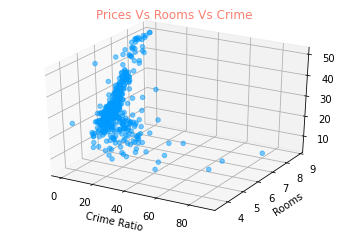

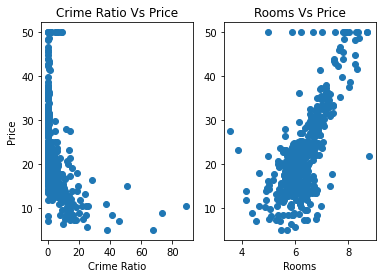

In [18]:
bostonData = load_boston()

#Tomaremos los valores del numero de habitaciones e indice de criminalidad

X = np.array([bostonData.data[:,0], bostonData.data[:,5]]).T
Y = np.array([bostonData.target]).T

#Imprimos un grafico 3D para representar la dispersion de los datos.
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X[:,0], X[:,1], Y[:,0], alpha=0.5, c='#09f')
plt.ylabel('Rooms')
plt.xlabel('Crime Ratio')
plt.title("Prices Vs Rooms Vs Crime", c='salmon')
plt.show()

#Realizamos una comparacion de los datos, respecto a cada variable.
plt.subplot(1, 2, 1)
plt.scatter(X[:,0], Y[:,0])
plt.title('Crime Ratio Vs Price')
plt.xlabel('Crime Ratio')
plt.ylabel('Price')
plt.subplot(1, 2, 2)
plt.scatter(X[:,1], Y[:,0])
plt.title('Rooms Vs Price')
plt.xlabel('Rooms')

#Columna de 1 para el termino independiente en X
ones = np.array([np.ones(len(X))])
X = np.concatenate((ones.T, X), axis=1)



Aplicamos la funcion a optimizar: $\theta = (X^{T}X)^{-1}X^{T}Y$

In [14]:
#Funcion para hallar valores optimos de theta
def Theta(X, Y):
    theta = np.linalg.inv(X.T @ X) @ X.T @ Y
    return theta

#Funcion para crear la regression:
def LinearRegression(X, Y):
    theta = Theta(X, Y)
    model = lambda x: x @ theta
    return model

model = LinearRegression(X, Y)

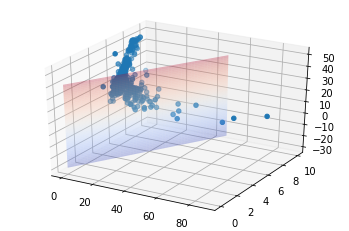

In [21]:
figu = plt.figure()
res = 100
aX = np.array([np.ones(res), np.linspace(0, 50, res), np.linspace(0,10, 100)]).T
Z = model(aX)
axis = figu.gca(projection='3d')
axis.plot_surface(aX[:,1], aX[:,2], Z, cmap='coolwarm', alpha=0.3)
_x = X[:,[1,2]]
axis.scatter(_x[:,0], _x[:,1], Y)